In [3]:
from econometron.Models.Neuralnets import n_beats
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
GDP=pd.read_csv("../../Data_Fred/gdp.csv", index_col=0, parse_dates=True)/1000

<Axes: xlabel='observation_date'>

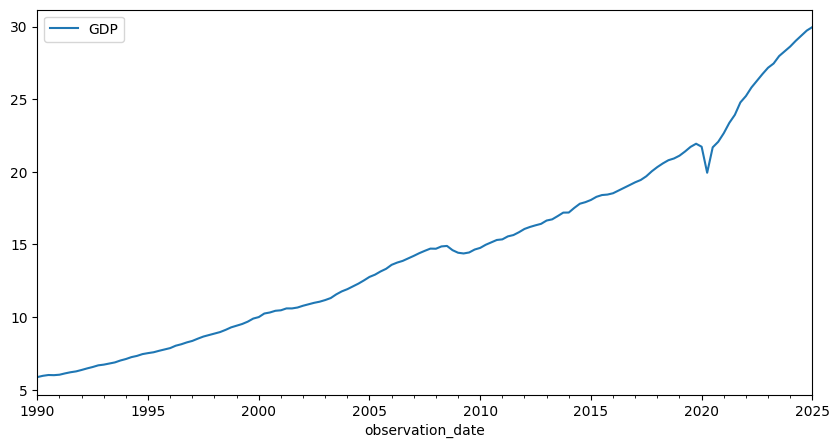

In [5]:
GDP.plot(figsize=(10, 5))

In [6]:
backcast_length = 10   # Use 20 Q's of history
forecast_length = 5     # Predict next 5 Q's

# Create stack configurations
stack_configs = [
    {
        'n_blocks': 4,
        'basis_type': 'polynomial',
        'n_layers_per_block': 6,
        'hidden_size': 512,
        'degree': 2,
        'share_weights': True
    },
    {
        'n_blocks': 4,
        'basis_type': 'fourier',
        'n_layers_per_block': 6,
        'hidden_size': 512,
        'share_weights': True
    },
    {
        'n_blocks': 4,
        'basis_type': 'generic',
        'n_layers_per_block': 6,
        'hidden_size': 512,
        'share_weights': True
    }
]

In [7]:
model = n_beats.NeuralForecast(
    stack_configs=stack_configs,
    backcast_length=backcast_length,
    forecast_length=forecast_length
)
print(f"Model created with {sum(p.numel() for p in model.model.parameters()):,} parameters")

NeuralForecast initialized on cpu
Model parameters: 3,972,656
Model created with 3,972,656 parameters


In [8]:
o=GDP.values

In [9]:
train_data, val_data, test_data = model.process_data(data=o,train_ratio=0.8,val_ratio=0.15,normalize=False)

Data processed - Train: 101, Val: 19, Test: 7


In [10]:
train_data.shape

torch.Size([101, 15])

In [11]:
train_data.ndim

2

In [12]:
history = model.fit(
    train_data=train_data,
    val_data=val_data,
    epochs=160,
    batch_size=64,
    learning_rate=1e-4,
    optimizer='adam',
    loss_function='mae',
    early_stopping=True,
    patience=15,
    scheduler='plateau',
    gradient_clip=1.0,
    verbose=True
)

Starting training...
Epoch 10/160 - Train Loss: 126.085375, Val Loss: 171.857590, LR: 1.00e-04, Time: 0.69s
Epoch 20/160 - Train Loss: 7.804498, Val Loss: 11.335131, LR: 2.50e-05, Time: 0.65s
Epoch 30/160 - Train Loss: 3.065673, Val Loss: 5.702322, LR: 2.50e-05, Time: 0.93s
Epoch 40/160 - Train Loss: 2.811252, Val Loss: 5.454771, LR: 6.25e-06, Time: 0.68s
Epoch 50/160 - Train Loss: 3.948493, Val Loss: 5.534053, LR: 6.25e-06, Time: 0.47s
Epoch 60/160 - Train Loss: 1.708743, Val Loss: 4.410634, LR: 3.13e-06, Time: 0.66s
Epoch 70/160 - Train Loss: 1.362992, Val Loss: 2.821306, LR: 1.56e-06, Time: 1.62s
Epoch 80/160 - Train Loss: 0.855845, Val Loss: 3.653224, LR: 1.56e-06, Time: 0.87s
Epoch 90/160 - Train Loss: 0.712237, Val Loss: 3.097819, LR: 3.91e-07, Time: 0.61s
Early stopping at epoch 91
Training completed! Best validation loss: 2.376570


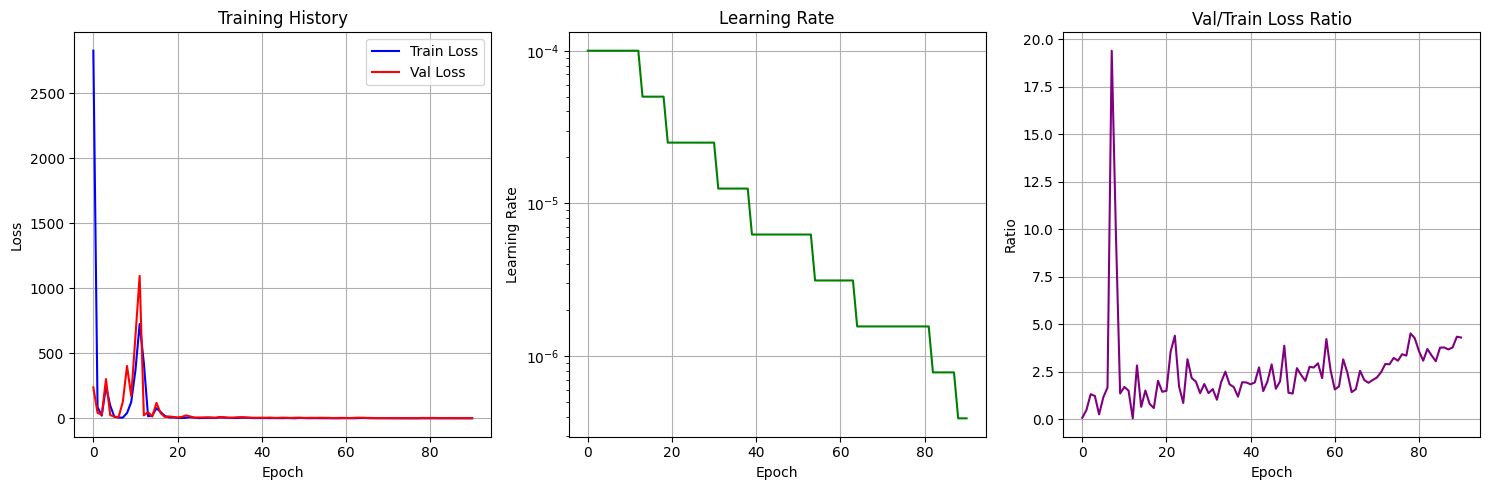

In [13]:
model.plot_training_history()

In [14]:
test_metrics = model.evaluate(
    test_data=test_data,
    metrics=['mae', 'mse', 'rmse', 'mape']
)

Evaluation Results:
------------------------------
MAE: 3.276664
MSE: 15.742020
RMSE: 3.967621
MAPE: 11.702350


In [18]:
GDP.mean()

GDP    14.681495
dtype: float64

In [35]:
recent_data = GDP.values
input_sequence = recent_data[-backcast_length:].T
forecast, components = model.forecast(
    input_sequence=input_sequence,
    return_components=True
)
print(f"Forecast for next {forecast_length} Quarter:")
for i, pred in enumerate(forecast.flatten()):
    print(f"Quarters {i+1}: {pred:.2f}")

Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Forecast for next 5 Quarter:
Quarters 1: 19.17
Quarters 2: 15.74
Quarters 3: 11.86
Quarters 4: 7.01
Quarters 5: 1.19


In [2]:
model.plot_forecast(historical_data=GDP[:].T, forecast_data=forecast.T)

NameError: name 'model' is not defined

In [3]:
import scipy.io

In [5]:
# Load the interest rate
data = scipy.io.loadmat('Z.mat')["Z"][0, :]*1000

# Plot the raw data
# plt.figure(figsize=(10, 4))
# plt.plot(data, label="Interest Rate (log HP-filtered)")
# plt.title("Interest Rate Time Series")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.legend()
# plt.show()

In [6]:
data.shape

(117,)

In [25]:
type(data)

numpy.ndarray

In [26]:
train_data, val_data, test_data = model.process_data(
    data=data,
    train_ratio=0.8,
    val_ratio=0.15,
    normalize=False
)

Data processed - Train: 82, Val: 15, Test: 6


In [27]:
train_data.shape

torch.Size([82, 15])

In [28]:
history = model.fit(
    train_data=train_data,
    val_data=val_data,
    epochs=100,
    batch_size=32,
    learning_rate=1e-3,
    optimizer='adam',
    loss_function='mae',
    early_stopping=True,
    patience=15,
    scheduler='plateau',
    gradient_clip=1.0,
    verbose=True
)

Starting training...
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
stack_forecast shape: torch.Size([32, 5])
residual shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torch.Size([32, 10])
Input shape: torc

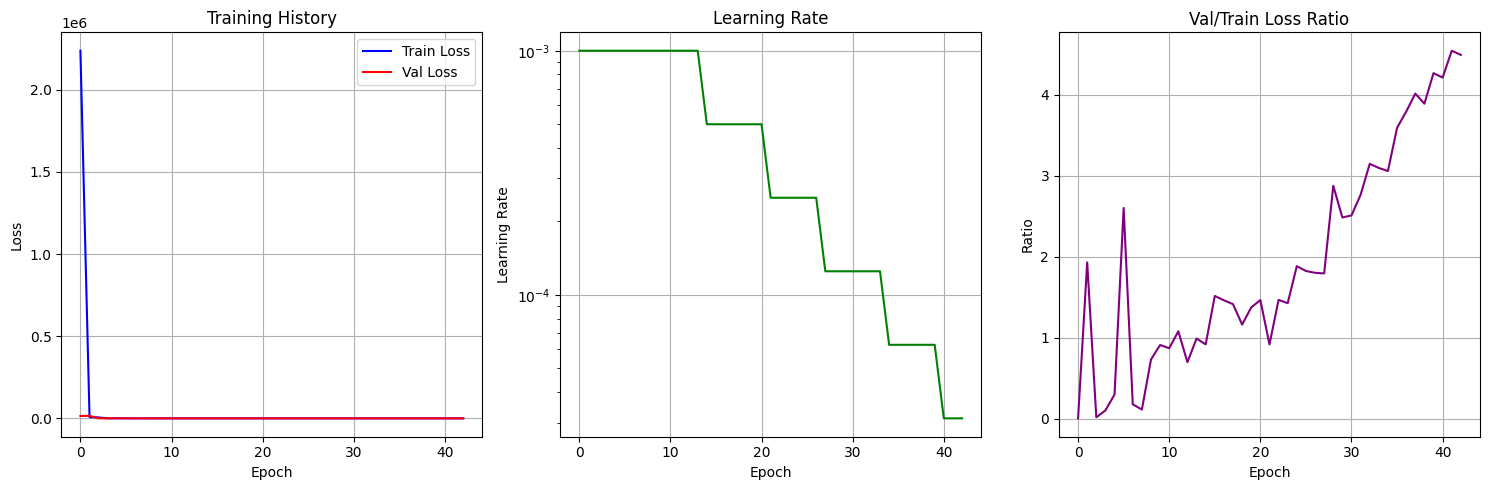

In [29]:
model.plot_training_history()

In [30]:
test_metrics = model.evaluate(
    test_data=test_data,
    metrics=['mae', 'mse', 'rmse', 'mape']
)

Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size([1, 5])
residual shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
stack_forecast shape: torch.Size

In [32]:
recent_data = data
input_sequence = recent_data[-backcast_length:]
forecast, components = model.forecast(
    input_sequence=input_sequence,
    return_components=True
)
print(f"Forecast for next {forecast_length} Quarter:")
for i, pred in enumerate(forecast.flatten()):
    print(f"Quarters {i+1}: {pred:.2f}")

Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Forecast for next 5 Quarter:
Quarters 1: -5.98
Quarters 2: -5.49
Quarters 3: -4.38
Quarters 4: -2.75
Quarters 5: -0.92


Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])
Input shape: torch.Size([1, 10])


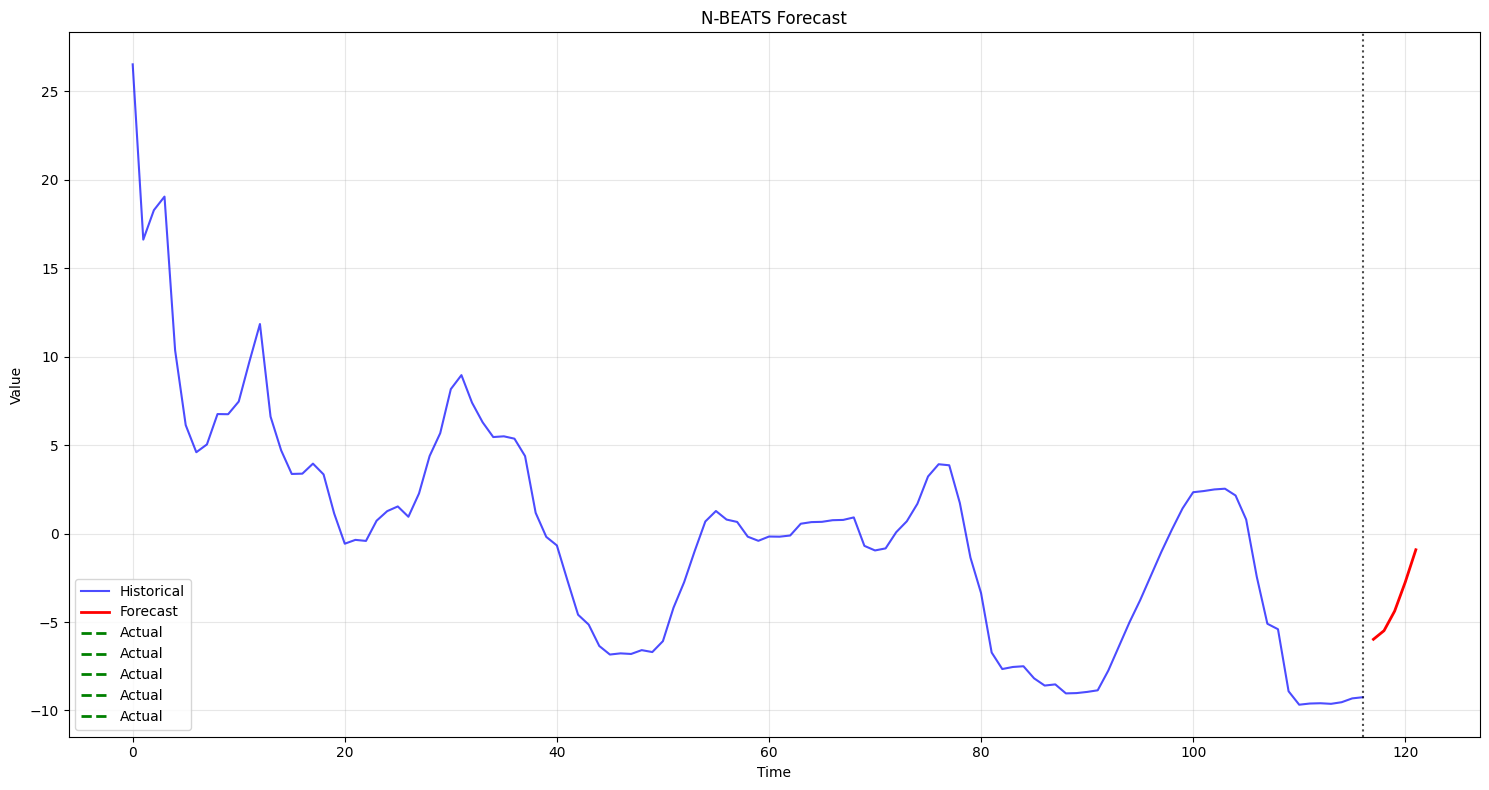

In [40]:
model.plot_forecast(historical_data=data,forecast_data=forecast)